In [18]:
import numpy as np
import matplotlib.pyplot as plt


In [19]:
# shape (50, 2)
data2d = np.loadtxt("./data/data2D.csv", delimiter=',') 
# shape (500, 1000)
data1000d = np.loadtxt("./data/data1000D.csv", delimiter=',') 

In [20]:

def buggy_pca(X, k):
    d = X.shape[1]
    u, s, vt = np.linalg.svd(X)
    V = vt[range(k)].reshape((d, k)) 
    Z = np.matmul(X, V)
    re_X = np.matmul(Z, V.T) 
    return V, Z, re_X

In [21]:
def demean_X(X):
    X_d = X.copy()
    mu = np.mean(X_d, axis=0)
    return (X_d - mu), mu

def demeaned_pca(X, k):
    X_d, mu = demean_X(X)
    V, Z, re_X = buggy_pca(X_d, k)
    return V, Z, (re_X + mu)

In [22]:
def normalize_X(X):
    X_n = X.copy()
    mu = np.mean(X_n, axis=0)
    sd = np.std(X_n, axis=0)
    return ((X_n - mu) / sd), mu, sd

def normalized_pca(X, k):
    X_n, mu, sd = normalize_X(X)
    V, Z, re_X = buggy_pca(X_n, k)
    return V, Z, (re_X * sd) + mu


In [23]:
def plot_2d_pca(X, re_X):
    plt.scatter(X[:, 0], X[:, 1], c="blue", marker='x')
    plt.scatter(re_X[:, 0], re_X[:, 1], c="red", marker='+')

def get_reconstruction_error(X, re_X):
    return round((np.linalg.norm(X - re_X)**2) / len(X), 6)

0.886903


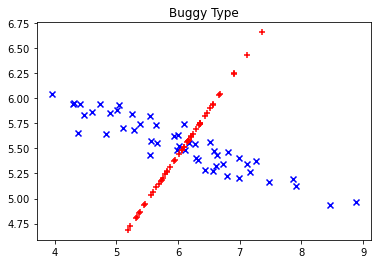

In [24]:
bv, bz, bx = buggy_pca(data2d, 1)
print(get_reconstruction_error(data2d, bx))
plot_2d_pca(data2d, bx)
plt.title("Buggy Type")
plt.savefig("./buggy_pca.png")
plt.show()


0.010006


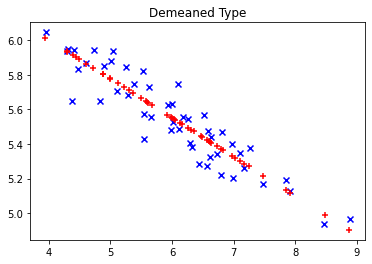

In [25]:
dv, dz, dx = demeaned_pca(data2d, 1)
print(get_reconstruction_error(data2d, dx))
plot_2d_pca(data2d, dx)
plt.title("Demeaned Type")
plt.savefig("./demeaned_pca.png")
plt.show()

0.049472


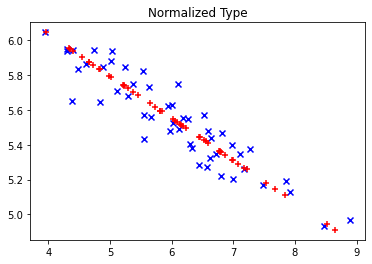

In [26]:
nv, nz, nx = normalized_pca(data2d, 1)
print(get_reconstruction_error(data2d, nx))
plot_2d_pca(data2d, nx)
plt.title("Normalized Type")
plt.savefig("./normalized_pca.png")
plt.show()

In [27]:
k = [100, 200, 300, 400, 500, 600, 700, 800, 900]
buggy_rc_error = []
demeaned_rc_error = []
normalized_rc_error = []
for i in range(len(k)):
    bv, bz, bx = buggy_pca(data1000d, k[i])
    buggy_rc_error.append(get_reconstruction_error(data1000d, bx))
    dv, dz, dx = demeaned_pca(data1000d, k[i])
    demeaned_rc_error.append(get_reconstruction_error(data1000d, dx))
    nv, nz, nx = normalized_pca(data1000d, k[i])
    normalized_rc_error.append(get_reconstruction_error(data1000d, nx))

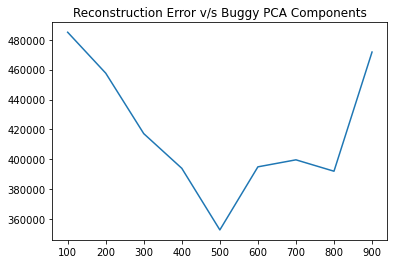

In [28]:
plt.plot(k, buggy_rc_error)
plt.title("Reconstruction Error v/s Buggy PCA Components")
plt.savefig("./buggy_error_curve.png")
plt.show()


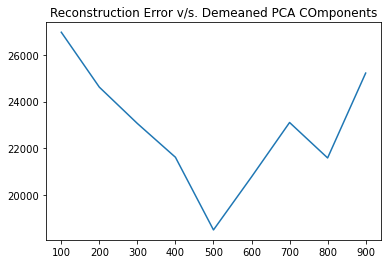

In [29]:
plt.plot(k, demeaned_rc_error)
plt.title("Reconstruction Error v/s. Demeaned PCA COmponents")
plt.savefig("./demeaned_error_curve.png")
plt.show()

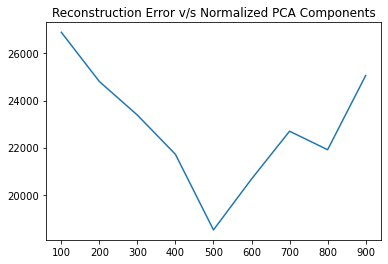

In [30]:
plt.plot(k, normalized_rc_error)
plt.title("Reconstruction Error v/s Normalized PCA Components")
plt.savefig("./normalized_error_curve.png")
plt.show()


In [31]:

bv, bz, bx = buggy_pca(data1000d, 500)
print(get_reconstruction_error(data1000d, bx))

dv, dz, dx = demeaned_pca(data1000d, 500)
print(get_reconstruction_error(data1000d, dx))

nv, nz, nx = normalized_pca(data1000d, 500)
print(get_reconstruction_error(data1000d, nx))

352741.458071
18509.059959
18503.165036
